In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from IPython.display import display

pd.set_option('display.max_rows', None) # показывать больше строк
#pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_math = pd.read_csv('C:/Users/in_he/Downloads/stud_math.csv')
print(stud_math)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     NaN       A   4.0   4.0   at_home   teacher   
1       GP   F   17       U     GT3     NaN   1.0   1.0   at_home     other   
2       GP   F   15       U     LE3       T   1.0   1.0   at_home     other   
3       GP   F   15       U     GT3       T   4.0   2.0    health       NaN   
4       GP   F   16       U     GT3       T   3.0   3.0     other     other   
5       GP   M   16       U     LE3       T   4.0   3.0  services     other   
6       GP   M   16     NaN     LE3       T   2.0   2.0     other     other   
7       GP   F   17       U     GT3       A   4.0   4.0     other   teacher   
8       GP   M   15       U     LE3       A   3.0   2.0  services     other   
9       GP   M   15       U     NaN     NaN   3.0   4.0     other     other   
10      GP   F   15       U     GT3       T   4.0   4.0   teacher    health   
11      GP   F   15       U     GT3     NaN   2.0  4

In [2]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
def get_firstview(y):   
    y = y.astype(str).apply(lambda x: None if x == 'NaN' else x)     #убираем пустые значения
    y.hist(bins = 30)
    y.describe()
    display(pd.DataFrame(y.value_counts()))
    print("Уникальных значений:", y.nunique())
   # print(stud_math.loc[:, ['y']].info())


In [4]:
display(stud_math.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

,school
GP,349
MS,46


Уникальных значений: 2


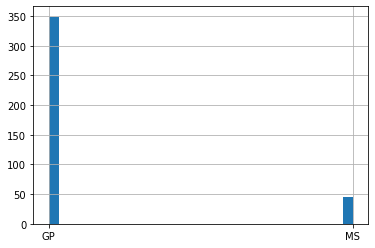

In [5]:
#0 school
get_firstview(stud_math.school)


In [6]:
#в списке ученики из 2х школ. из одной 349, другой 46. пропусков нет.

,sex
F,208
M,187


Уникальных значений: 2


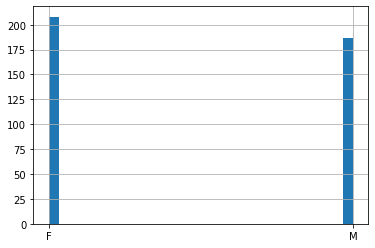

In [7]:
#1 sex
get_firstview(stud_math.sex)

In [8]:
# учеников мужского пола и женского примерно одинаково. пропусков нет.

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Уникальных значений: 8


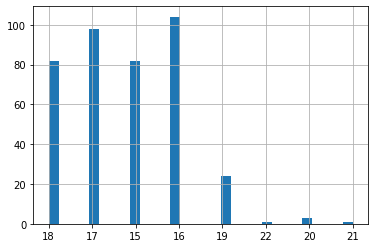

In [9]:
#2 age
get_firstview(stud_math.age)

In [10]:

# основная масса учеников от 15 до 18 лет. в 19 резкое уменьшение количества учащихся.
#  в 20 всего 3 учащегося. в 21 и 22 всего по 1му. бедолаги из магистратуры? пропусков нет.

,address
U,295
R,83
nan,17


Уникальных значений: 3


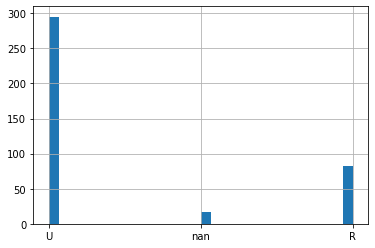

In [11]:
#3 address  
get_firstview(stud_math.address)

In [12]:
# большая часть учеников проживает в городе. присутствуют пустые значения.

,famsize
GT3,261
LE3,107
nan,27


Уникальных значений: 3


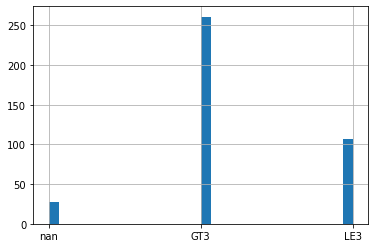

In [13]:
#4 famsize
get_firstview(stud_math.famsize)

In [14]:
# большая часть учеников из семей где больше 3х человек. присутствуют пустые значения.

,Pstatus
T,314
nan,45
A,36


Уникальных значений: 3


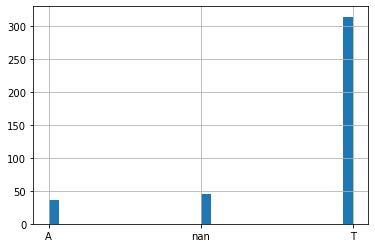

In [15]:
#5 Pstatus
get_firstview(stud_math.Pstatus)

In [16]:
# большая часть учеников из полных семей. присутствуют пустые значения.

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
nan,3
0.0,3


Уникальных значений: 6


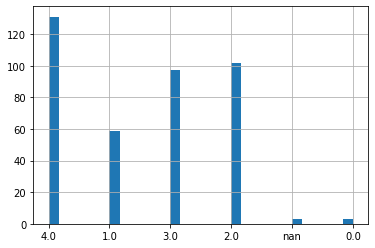

In [17]:
# 6   Medu
get_firstview(stud_math.Medu)

In [18]:
# чаще всего матери учеников имеют высшее образование

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
nan,24
0.0,2
40.0,1


Уникальных значений: 7


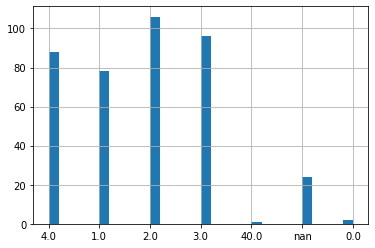

In [19]:
# 7   Fedu
get_firstview(stud_math.Fedu)

,Fedu
2.0,106
3.0,96
4.0,89
1.0,78
nan,24
0.0,2


Уникальных значений: 6


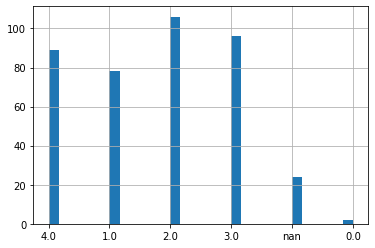

In [20]:
#видим выброс со значением 40.0. Вероятнее всего это опечатка. Исправляю.
stud_math.Fedu = stud_math.Fedu.astype(str).apply(lambda x: 4.0 if x == '40.0' else x)
get_firstview(stud_math.Fedu)

In [21]:
# чаще всего у отцов учеников имеют среднее или среднее специальное образование. присутствуют пустые значения.

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32
nan,19


Уникальных значений: 6


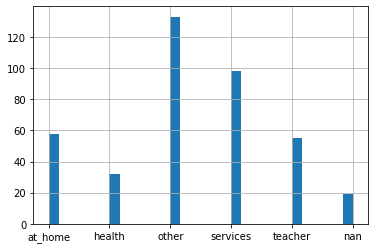

In [22]:
# 8   Mjob
get_firstview(stud_math.Mjob)

,Fjob
other,197
services,102
nan,36
teacher,29
at_home,16
health,15


Уникальных значений: 6


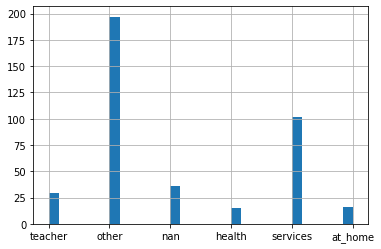

In [23]:
# 9   Fjob
get_firstview(stud_math.Fjob)

,reason
course,137
home,104
reputation,103
other,34
nan,17


Уникальных значений: 5


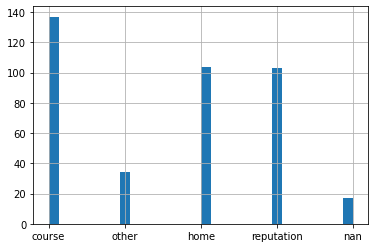

In [24]:
# 10   reason 
get_firstview(stud_math.reason)

In [25]:
# чаще всего выбирали школу из-за учебной программы. присутствуют пустые значения.

,guardian
mother,250
father,86
nan,31
other,28


Уникальных значений: 4


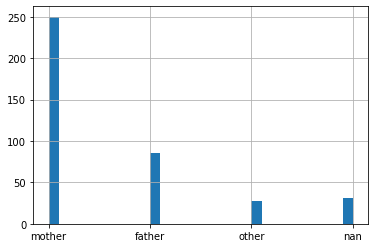

In [26]:
# 11   guardian 
get_firstview(stud_math.guardian)

In [27]:
# гораздо чаще опекуном(или тем кто занимается с ребенком?) является мать. присутствуют пустые значения.

,traveltime
1.0,242
2.0,96
nan,28
3.0,22
4.0,7


Уникальных значений: 5


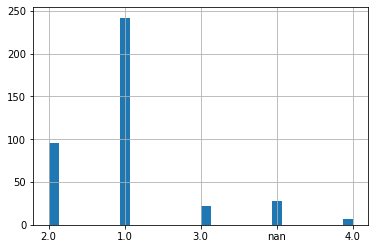

In [28]:
# 12   traveltime 
get_firstview(stud_math.traveltime)

In [29]:
# большинство учеников добирается до школы менее 15 минут. присутствуют пустые значения.

,studytime
2.0,194
1.0,103
3.0,64
4.0,27
nan,7


Уникальных значений: 5


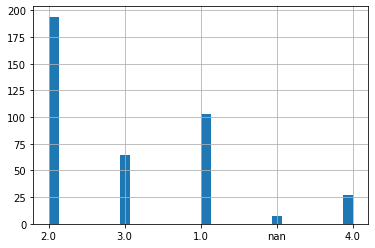

In [30]:
# 13   studytime
get_firstview(stud_math.studytime)

In [31]:
# большинство учеников учится дополнительно менее 2х часов в неделю. присутствуют пустые значения.

,failures
0.0,293
1.0,49
nan,22
2.0,16
3.0,15


Уникальных значений: 5


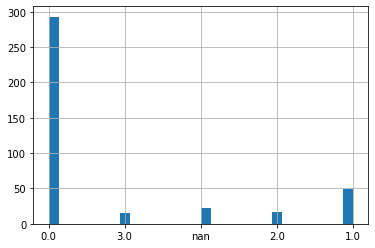

In [32]:
# 14   failures
get_firstview(stud_math.failures)

In [33]:
# из описания :количество внеучебных неудач (n, если 1<=n<=3, иначе 0). не понимаю что значит.
# т.к. Если нет неудач - стоит код 0. и если 100 неудач - тоже стоит код 0. 
# Может быть у всех кто занимается чем либо во внеучебное время бывают неудачи и не всё получается с первого раза?
# присутствуют пустые значения.

,schoolsup
no,335
yes,51
nan,9


Уникальных значений: 3


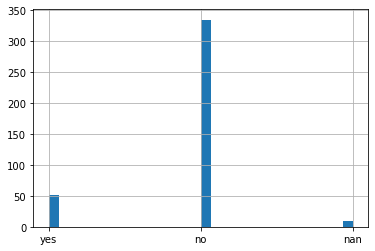

In [34]:
# 15   schoolsup
get_firstview(stud_math.schoolsup)

In [35]:
# очень маленькой части учеников нужнана дополнительная образовательная поддержка. присутствуют пустые значения.

,famsup
yes,219
no,137
nan,39


Уникальных значений: 3


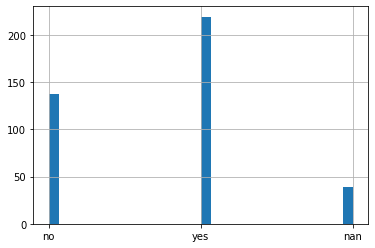

In [36]:
# 16   famsup
get_firstview(stud_math.famsup)

In [37]:
# большая часть учеников занимаются дома дополнительно. присутствуют пустые значения.

,paid
no,200
yes,155
nan,40


Уникальных значений: 3


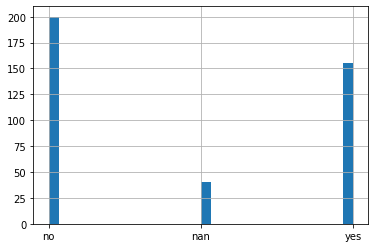

In [38]:
# 17   paid
get_firstview(stud_math.paid)

In [39]:
# большая часть учеников не занимаются математикой с репетитором дополнительно. присутствуют пустые значения.

,activities
yes,195
no,186
nan,14


Уникальных значений: 3


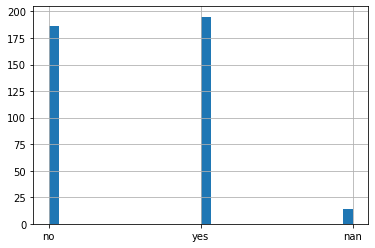

In [40]:
# 18   activities
get_firstview(stud_math.activities)

In [41]:
# половина учеников посещает дополнительные внеучебные занятия. присутствуют пустые значения.

,nursery
yes,300
no,79
nan,16


Уникальных значений: 3


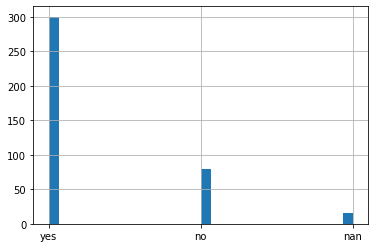

In [42]:
# 19   nursery
get_firstview(stud_math.nursery)

In [43]:
# почти все ученики ходили в детский сад. присутствуют пустые значения.

,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27
nan,7


Уникальных значений: 5


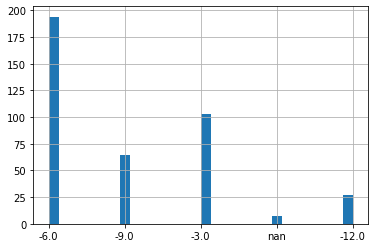

In [44]:
# 21   studytime, granular
get_firstview(stud_math['studytime, granular'])

,higher
yes,356
nan,20
no,19


Уникальных значений: 3


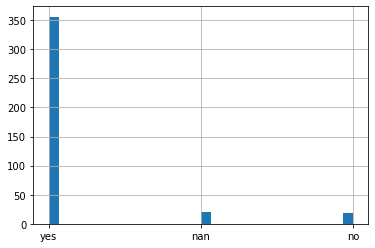

In [45]:
# 21   higher
get_firstview(stud_math.higher)

In [46]:
# почти все ученики хотят получить высшее образование. присутствуют пустые значения.

,internet
yes,305
no,56
nan,34


Уникальных значений: 3


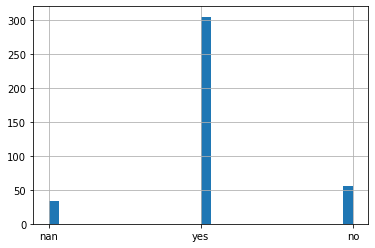

In [47]:
# 22   internet
get_firstview(stud_math.internet)

In [48]:
# почти у всех учеников имеется интернет дома. присутствуют пустые значения.

,romantic
no,240
yes,124
nan,31


Уникальных значений: 3


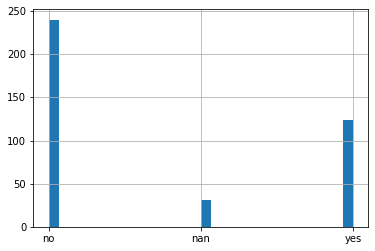

In [49]:
# 23   romantic
get_firstview(stud_math.romantic)

In [50]:
# почти 30 процентов всех учеников в романтических отношениях . присутствуют пустые значения.

,famrel
4.0,182
5.0,99
3.0,62
nan,27
2.0,17
1.0,7
-1.0,1


Уникальных значений: 7


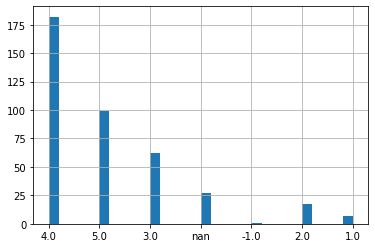

In [51]:
# 24   famrel 
get_firstview(stud_math.famrel)

,famrel
4.0,182
5.0,99
3.0,62
nan,27
2.0,17
1.0,8


Уникальных значений: 6


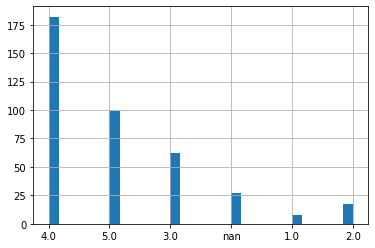

In [52]:
#видим выброс со значением -1,0. Вероятнее всего это опечатка. Исправляю.
stud_math.famrel = stud_math.famrel.astype(str).apply(lambda x: 1.0 if x == '-1.0' else x)
get_firstview(stud_math.famrel)

In [53]:
# почти у половины учеников хорошие семейные отношения. у четверти отличные. присутствуют пустые значения. 

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18
nan,11


Уникальных значений: 6


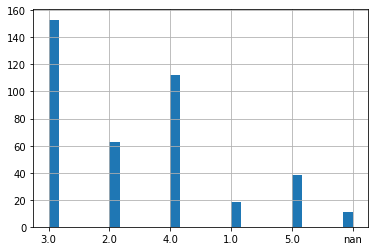

In [54]:
# 25   freetime 
get_firstview(stud_math.freetime )

In [55]:
#  у 153 учеников среднее кол-во свободного время после школы, у 112 - много. присутствуют пустые значения. 

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23
nan,8


Уникальных значений: 6


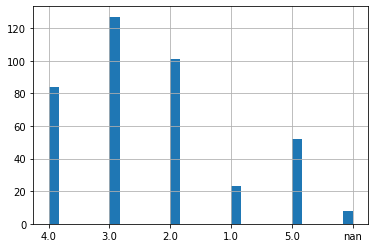

In [56]:
# 26   goout
get_firstview(stud_math.goout)

In [57]:
#  почти все ученики проводят среднее( или около того) кол-во свободного времени с друзьями. присутствуют пустые значения. 

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43
nan,15


Уникальных значений: 6


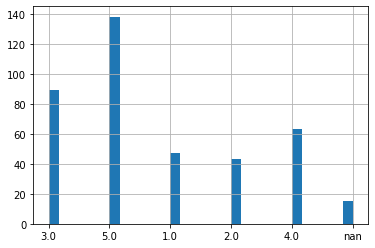

In [58]:
# 27   health
get_firstview(stud_math.health)

In [59]:
#  почти все ученики имеют здоровье среднее или выше среднего. присутствуют пустые значения. 

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
nan,12
14.0,12
3.0,8


Уникальных значений: 37


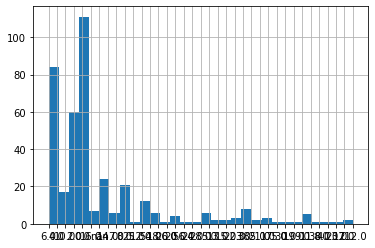

In [60]:
# 28   absences
get_firstview(stud_math.absences)

,absences
100.0,156
0.0,111
2.0,60
10.0,17
14.0,12
12.0,12
16.0,7
18.0,5
20.0,4
1.0,3


Уникальных значений: 15


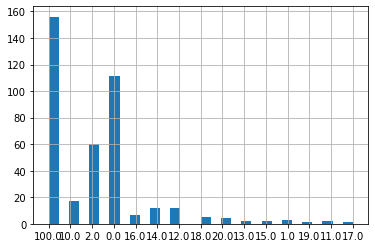

In [61]:
# много значений. уберем лишние
stud_math.absences = stud_math.absences.astype(str).apply(lambda x: 100.0 if x >= '21.0' else x)
get_firstview(stud_math.absences)

In [62]:
#  221 ученик пропускали больше 21 занятия. 111 не пропустили ни одного. присутствуют пустые значения . 

,score
50.0,54
55.0,46
0.0,37
75.0,33
60.0,31
65.0,31
40.0,31
70.0,27
45.0,27
80.0,16


Уникальных значений: 19


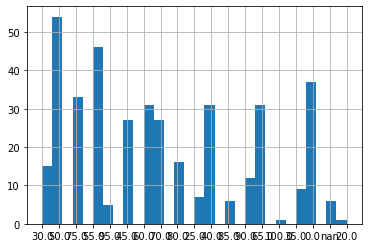

In [63]:
# 29  score
get_firstview(stud_math.score)

,score
6,100
7,62
8,60
5,58
4,24
9,22
10,18
3,8


Уникальных значений: 8


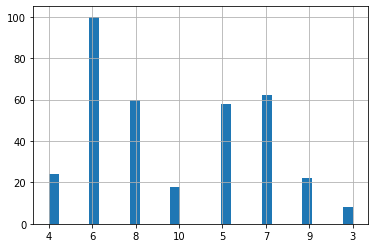

In [64]:
# много значений. уберем лишние
stud_math = stud_math[stud_math.score > 0]
def fix_score(x):
    if x<10:
        return 1
    if 10<=x<20:
        return 2
    if 20<=x<30:
        return 3
    if 30<=x<40:
        return 4
    if 40<=x<50:
        return 5
    if 50<=x<60:
        return 6
    if 60<=x<70:
        return 7
    if 70<=x<80:
        return 8
    if 80<=x<90:
        return 9
    if 90<=x:
        return 10

stud_math.score = stud_math.score.apply(fix_score)
get_firstview(stud_math.score)

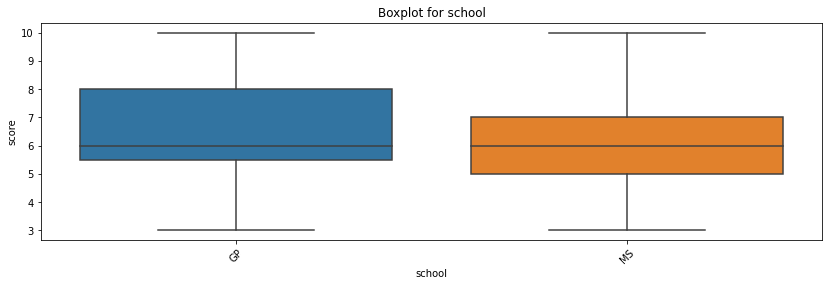

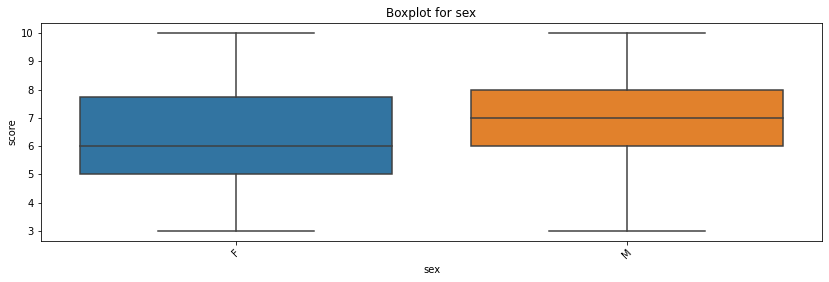

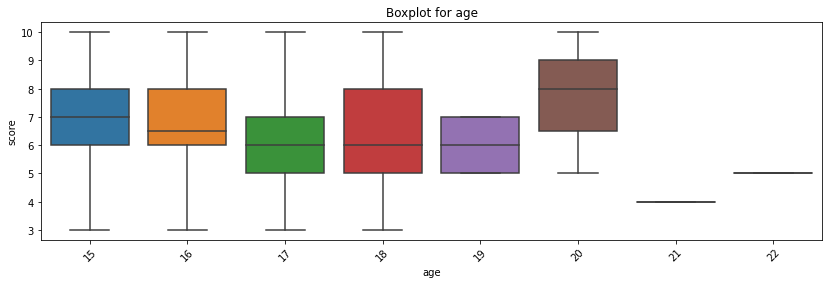

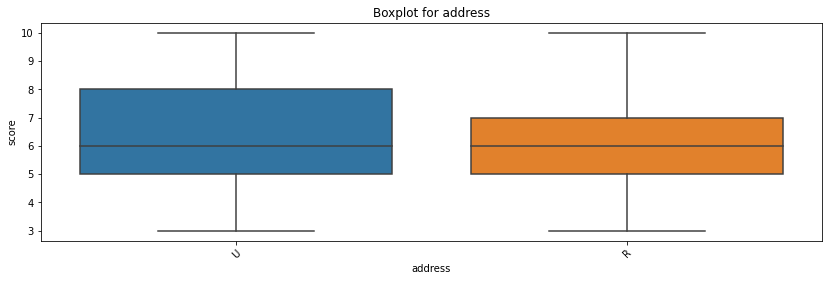

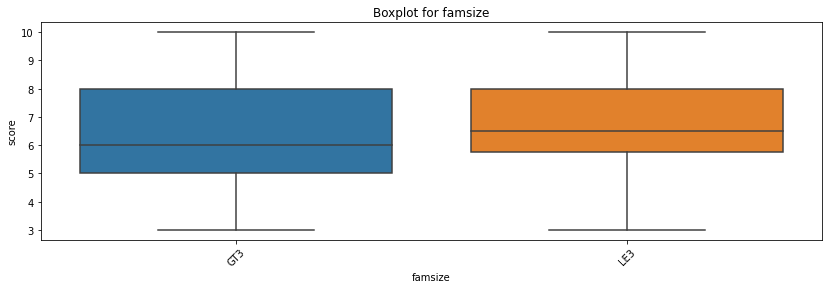

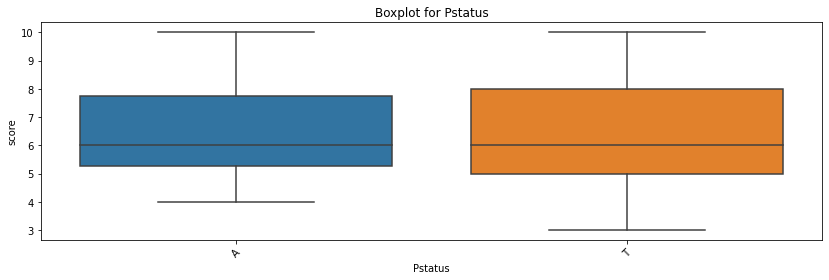

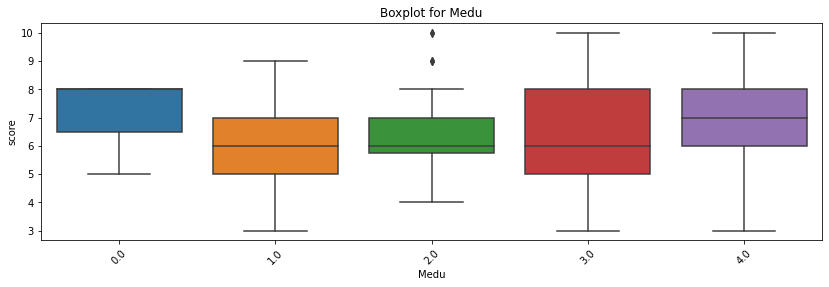

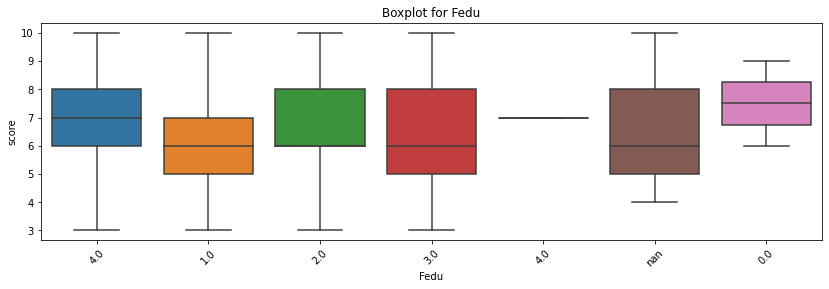

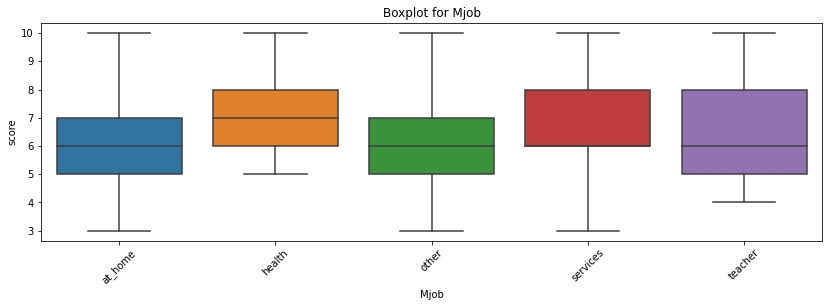

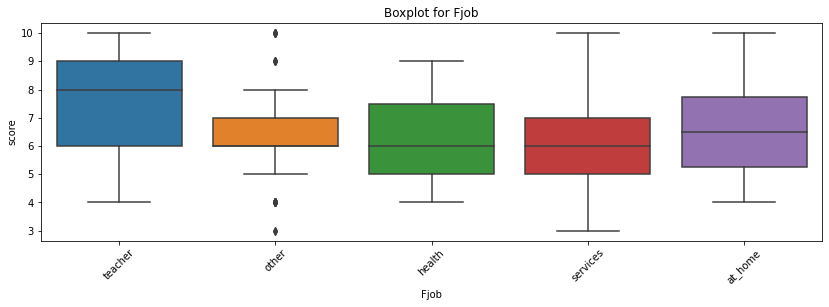

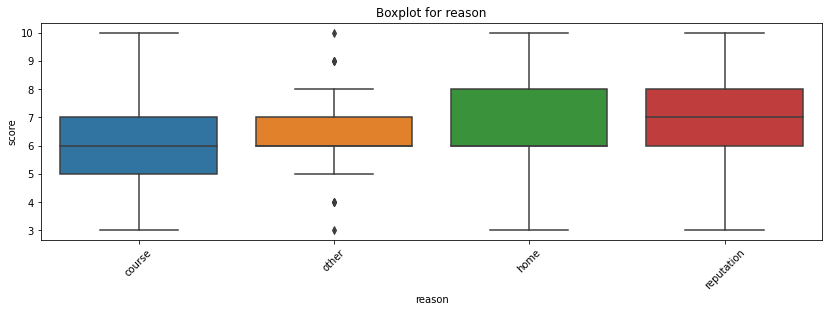

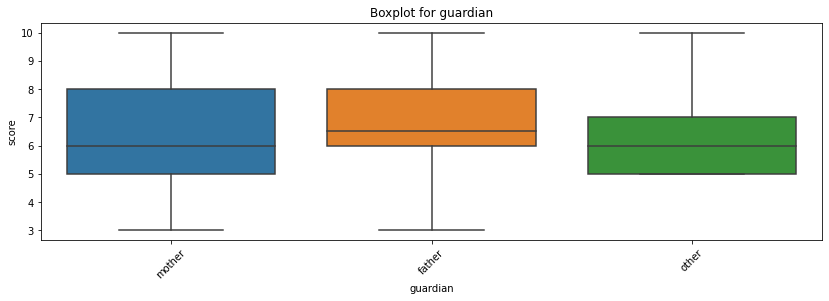

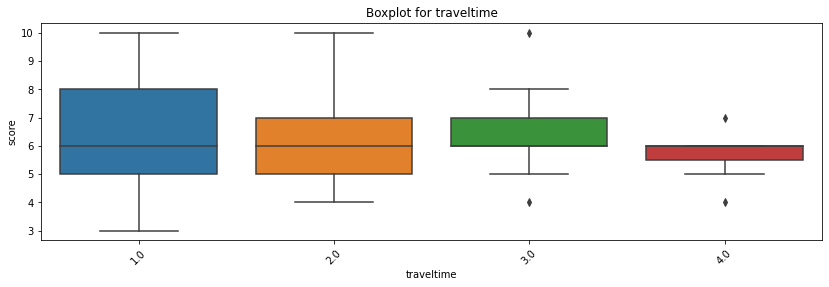

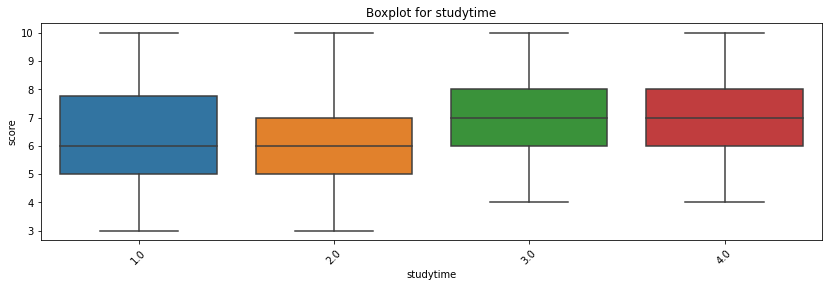

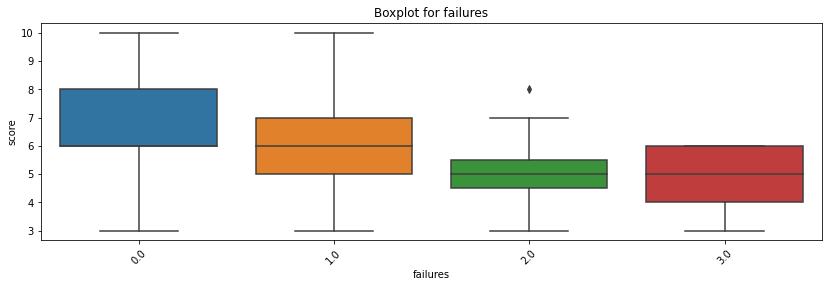

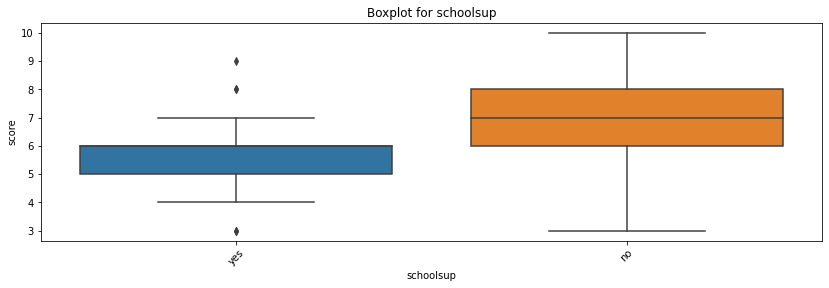

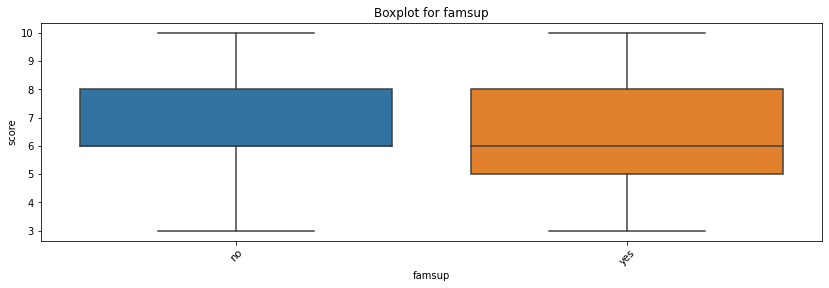

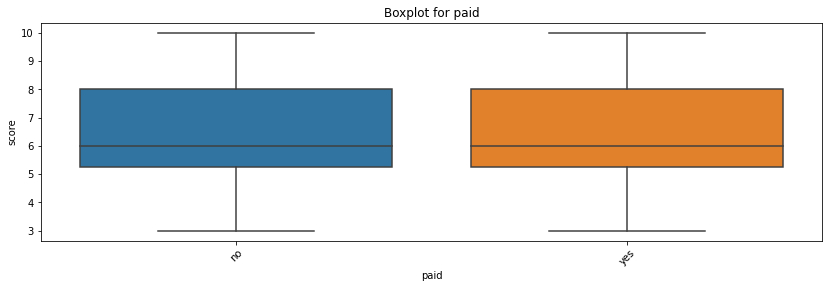

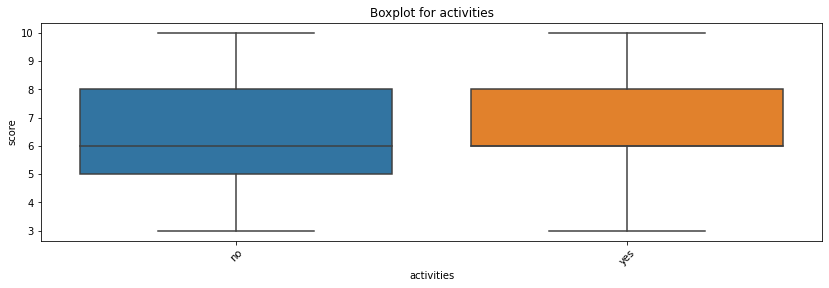

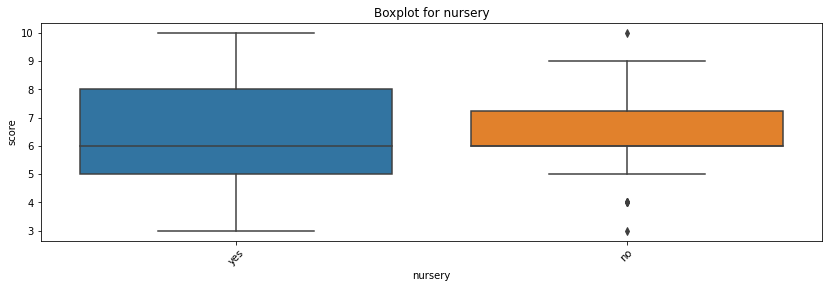

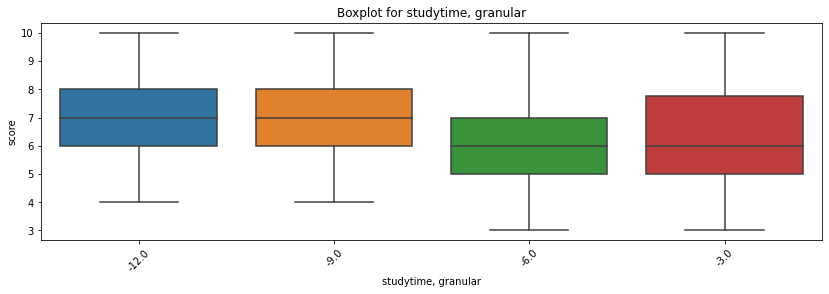

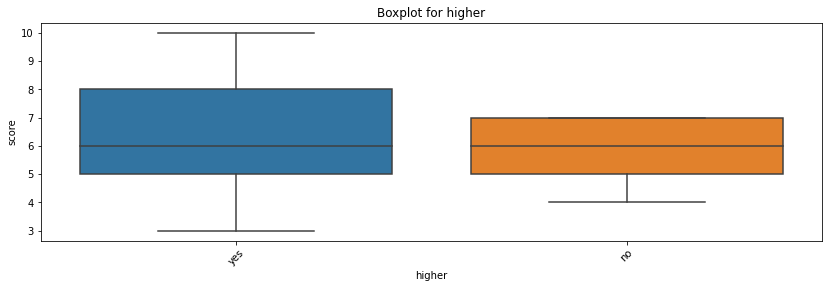

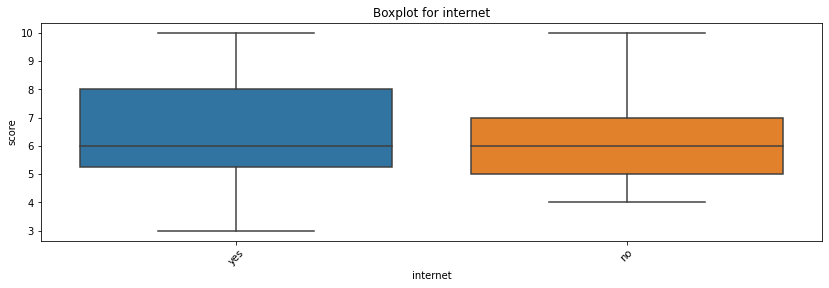

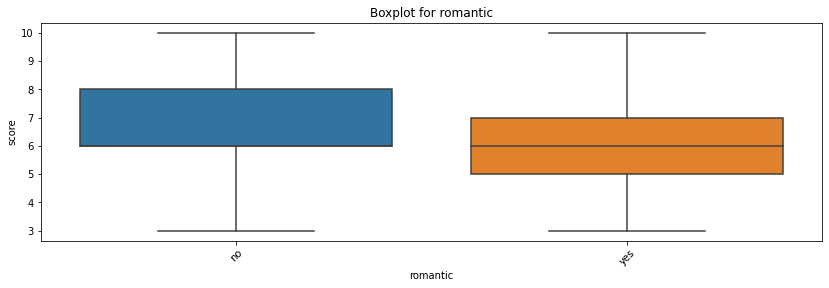

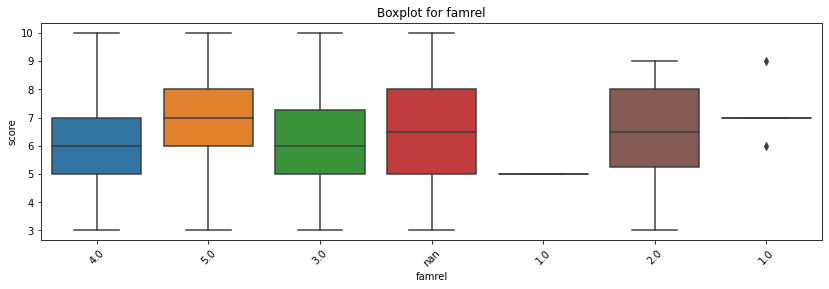

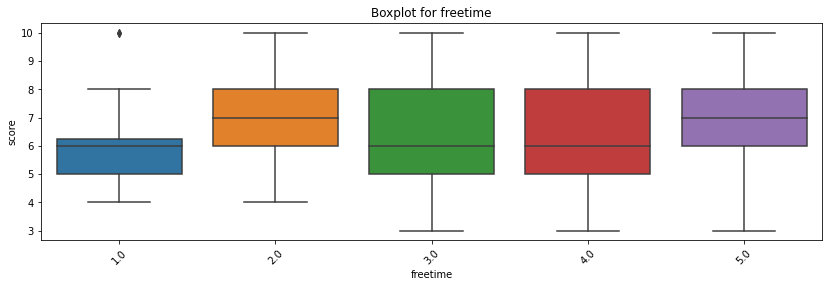

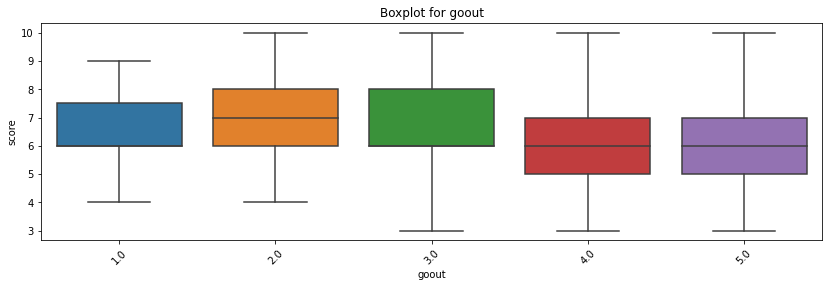

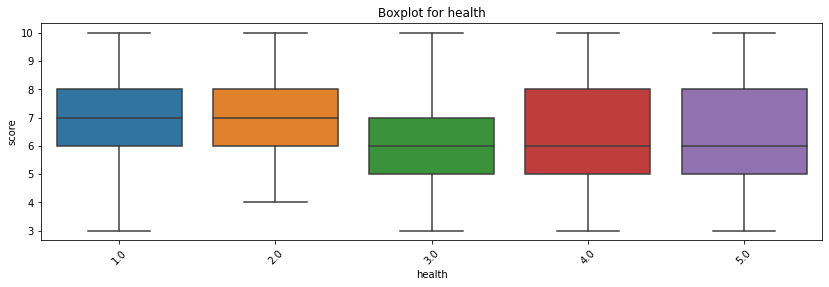

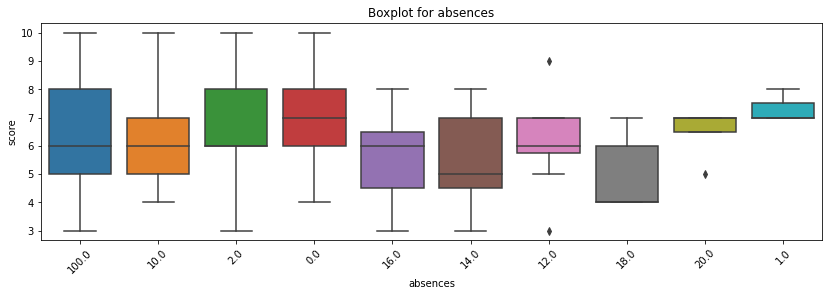

In [65]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score',
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences']:
    get_boxplot(col)

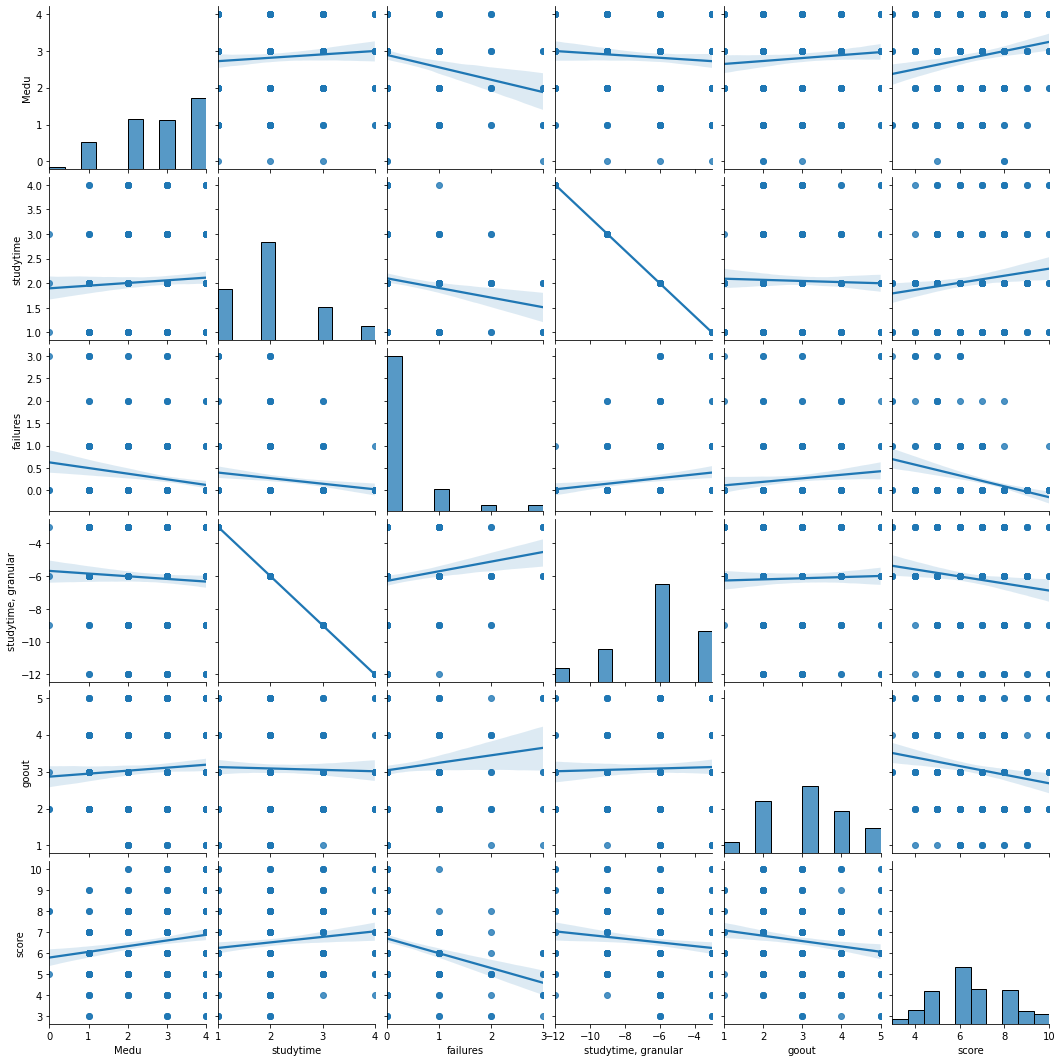

In [69]:
import seaborn
sns.pairplot(stud_math, kind = 'reg')

In [67]:
# убираем лишние столбцы
stud_math = stud_math.drop(['freetime', 'traveltime', 'health',  'age', 'famsize', 'Pstatus', 'reason', 'guardian', 'paid'], axis=1)
display(stud_math)

,school,sex,address,Medu,Fedu,Mjob,Fjob,studytime,failures,schoolsup,famsup,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,goout,absences,score
0,GP,F,U,4.0,4.0,at_home,teacher,2.0,0.0,yes,no,no,yes,-6.0,yes,NaN,no,4.0,4.0,100.0,4
1,GP,F,U,1.0,1.0,at_home,other,2.0,0.0,no,yes,no,no,-6.0,yes,yes,no,5.0,3.0,100.0,4
2,GP,F,U,1.0,1.0,at_home,other,2.0,3.0,yes,no,no,yes,-6.0,yes,yes,NaN,4.0,2.0,10.0,6
3,GP,F,U,4.0,2.0,health,NaN,3.0,0.0,no,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,8
4,GP,F,U,3.0,3.0,other,other,2.0,0.0,no,yes,no,yes,-6.0,yes,no,no,4.0,2.0,100.0,6
5,GP,M,U,4.0,3.0,services,other,2.0,0.0,no,yes,yes,yes,-6.0,yes,yes,no,5.0,2.0,10.0,8
6,GP,M,NaN,2.0,2.0,other,other,2.0,0.0,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,0.0,6
7,GP,F,U,4.0,4.0,other,teacher,2.0,0.0,yes,yes,no,yes,-6.0,yes,no,no,4.0,4.0,100.0,4
8,GP,M,U,3.0,2.0,services,other,2.0,0.0,no,yes,no,yes,-6.0,yes,yes,no,nan,2.0,0.0,10
9,GP,M,U,3.0,4.0,other,other,2.0,0.0,no,yes,yes,yes,-6.0,yes,yes,no,5.0,1.0,0.0,8


In [68]:
# Вывод:
больше шанс получить хорошую оценку у
1 ученика школы GP чем MS
2 у мальчика
3 проживающего в городе
4 в семье из 3х человек или менее
5 с образованием матери (3- среднее специальное или 11 классов, 4 - высшее)
6 с образованием отца (3- среднее специальное или 11 классов, 4 - высшее)
7 если мать работает медиком/госслужащим или учителем
8 если отец работает учителем
9 у которых studytime выше
10 у которых failures ниже
11 которые справляются без schoolsup
12 которые справляются без famlsup
13 которые ходят на activities — дополнительные внеучебные занятия
14  который  хочет получить высшее образование (higher - yes)
15 дома есть интернет
16 не состоят в романтических отношениях
17 у которых есть свободное время (не 1 - очень мало)
18 которые не пропускают занятия

SyntaxError: invalid syntax (<ipython-input-68-ac30d87413a7>, line 2)